In [1]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path)

import pandas as pd
import numpy as np
import math

import matplotlib as mpl
mpl.rcParams['figure.max_open_warning'] = 0

#force reimport
if 'pygents.aigents_api' in sys.modules:
    del sys.modules['pygents.aigents_api']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']

from pygents.aigents_api import tokenize_re, punct, TextMetrics, load_ngrams, build_ngrams
from pygents.plot import plot_dict
from pygents.util import dictcount, dict_compress_with_loss, dictdict_div_dict, dictdict_mul_dictdict

def language_metrics(lang,metrics_list,path):
    metrics = {}
    for m in metrics_list:
        metrics[m] = path + lang + '/' + m + '.txt'
    return metrics

In [2]:
lm = language_metrics('',['All-or-nothing_thinking','Fortune-telling','Mental_filter','Overgeneralization','Distortion',
                                                'Labeling','Mind_Reading','Personalization','Emotional_Reasoning','Magnification',
                                                'Should_statements'],
                                            path='./data/models/distortions/split_combined/multiclass_view_cleaned/joint/')
lm

{'All-or-nothing_thinking': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//All-or-nothing_thinking.txt',
 'Fortune-telling': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Fortune-telling.txt',
 'Mental_filter': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Mental_filter.txt',
 'Overgeneralization': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Overgeneralization.txt',
 'Distortion': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Distortion.txt',
 'Labeling': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Labeling.txt',
 'Mind_Reading': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Mind_Reading.txt',
 'Personalization': './data/models/distortions/split_combined/multiclass_view_cleaned/joint//Personalization.txt',
 'Emotional_Reasoning': './data/models/distortions/split_combined/multiclass_view_cleaned/jo

In [3]:
tm = TextMetrics(lm,encoding="utf-8",metric_logarithmic=True,debug=False)
tm.metrics

{'All-or-nothing_thinking': {('a', 'decision'),
  ('a', 'decision', 'and'),
  ('a', 'decision', 'and', 'that'),
  ('a', 'given'),
  ('a', 'given', 'issue'),
  ('a', 'given', 'issue', 'way'),
  ('a', 'week', 'ago', 'and'),
  ('about', 'a', 'given'),
  ('about', 'a', 'given', 'issue'),
  ('about', 'it', 'and', 'everything'),
  ('ago', 'and', 'now'),
  ('ago', 'and', 'now', 'i'),
  ('all', 'solved'),
  ('all', 'solved', 'and'),
  ('all', 'solved', 'and', 'i'),
  ('am', 'free'),
  ('am', 'free', 'or'),
  ('am', 'free', 'or', 'happy'),
  ('and', 'everything', 'i'),
  ('and', 'everything', 'i', 'just'),
  ('and', 'i', 'do', 'that'),
  ('and', 'i', 'know', 'it'),
  ('and', 'it’s', 'as'),
  ('and', 'it’s', 'as', 'if'),
  ('and', 'now', 'i', 'have'),
  ('and', 'that', 'problem'),
  ('and', 'that', 'problem', 'is'),
  ('because', 'im'),
  ('but', 'i', 'haven’t'),
  ('but', 'when', 'i', 'got'),
  ('can’t', 'focus'),
  ('can’t', 'focus', 'on'),
  ('can’t', 'stop', 'it'),
  ('can’t', 'stop', 'it', 

In [34]:
for m in tm.metrics:
    print(len(tm.metrics[m]),m)

190 All-or-nothing_thinking
235 Fortune-telling
75 Mental_filter
164 Overgeneralization
86176 Distortion
124 Labeling
276 Mind_Reading
198 Personalization
150 Emotional_Reasoning
183 Magnification
70 Should_statements


In [54]:
#left->right
#category = 'Labeling'
category = 'All-or-nothing_thinking'
#l = list(tm.metrics['Distortion'])
l = list(tm.metrics[category])
#l = list(tm.metrics['Mental_filter'])
l.sort()
l

[('a', 'decision'),
 ('a', 'decision', 'and'),
 ('a', 'decision', 'and', 'that'),
 ('a', 'given'),
 ('a', 'given', 'issue'),
 ('a', 'given', 'issue', 'way'),
 ('a', 'week', 'ago', 'and'),
 ('about', 'a', 'given'),
 ('about', 'a', 'given', 'issue'),
 ('about', 'it', 'and', 'everything'),
 ('ago', 'and', 'now'),
 ('ago', 'and', 'now', 'i'),
 ('all', 'solved'),
 ('all', 'solved', 'and'),
 ('all', 'solved', 'and', 'i'),
 ('am', 'free'),
 ('am', 'free', 'or'),
 ('am', 'free', 'or', 'happy'),
 ('and', 'everything', 'i'),
 ('and', 'everything', 'i', 'just'),
 ('and', 'i', 'do', 'that'),
 ('and', 'i', 'know', 'it'),
 ('and', 'it’s', 'as'),
 ('and', 'it’s', 'as', 'if'),
 ('and', 'now', 'i', 'have'),
 ('and', 'that', 'problem'),
 ('and', 'that', 'problem', 'is'),
 ('because', 'im'),
 ('but', 'i', 'haven’t'),
 ('but', 'when', 'i', 'got'),
 ('can’t', 'focus'),
 ('can’t', 'focus', 'on'),
 ('can’t', 'stop', 'it'),
 ('can’t', 'stop', 'it', 'and'),
 ('day', 'is'),
 ('decision', 'and'),
 ('decision', '

In [55]:
#right->left
r = [tuple(reversed(x)) for x in l]
r.sort()
r

[('a', 'about', 'think', 'to'),
 ('a', 'been', 'it’s'),
 ('a', 'made', 'have'),
 ('a', 'made', 'have', 'i'),
 ('a', 'trouble'),
 ('a', 'trouble', 'some'),
 ('a', 'trouble', 'some', 'had'),
 ('about', 'think', 'to', 'is'),
 ('about', 'think', 'to', 'myself'),
 ('ago', 'week', 'a', 'trouble'),
 ('all', 'is', 'problem'),
 ('all', 'is', 'problem', 'that'),
 ('am', 'i', 'when', 'however'),
 ('and', 'ago', 'week'),
 ('and', 'ago', 'week', 'a'),
 ('and', 'angry', 'i’m'),
 ('and', 'decision'),
 ('and', 'decision', 'a'),
 ('and', 'decision', 'a', 'made'),
 ('and', 'it', 'about', 'think'),
 ('and', 'it', 'stop'),
 ('and', 'it', 'stop', 'can’t'),
 ('and', 'solved'),
 ('and', 'solved', 'all'),
 ('and', 'solved', 'all', 'is'),
 ('are', 'why'),
 ('as', 'it’s'),
 ('as', 'it’s', 'and'),
 ('because', 'things'),
 ('but', 'side'),
 ('can’t', 'just', 'i', 'everything'),
 ('changed', 'everything'),
 ('death', 'his'),
 ('decision', 'a'),
 ('decision', 'a', 'made'),
 ('decision', 'a', 'made', 'have'),
 ('do'

In [56]:
#TODO count for compression
N_max = max([len(x) for x in l]) - 1
N_max

3

In [57]:
def tuple_find(self,pattern):
    pat_len = len(pattern)
    if pattern[0] in self:
        index = self.index(pattern[0])
        if len(pattern) == 1:
            return index
        if (len(self) - index) >= pat_len:
            if pattern == self[index:index + pat_len]:
                return index
    return -1

assert(tuple_find((1,2),(1,))==0)
assert(tuple_find((1,2),(2,))==1)
assert(tuple_find((1,2),(1,2))==0)
assert(tuple_find((1,2),(3,))==-1)
assert(tuple_find((1,2,3),(1,2))==0)
assert(tuple_find((1,2,3),(2,3))==1)
assert(tuple_find((1,2,3),(2,3,4))==-1)

def tuple_fix(self,pattern,index):
    pat_len = len(pattern)
    if self == pattern:
        return self
    if index == 0:
        return (pattern,) + self[pat_len:]
    if (len(self) - index) == pat_len:
        return self[:index] + (pattern,)
    return self[:index] + (pattern,) + self[index + pat_len:]
        
        
assert(tuple_fix((1,2,3,4),(1,2),0)==((1,2),3,4))
assert(tuple_fix((1,2,3,4),(3,4),2)==(1,2,(3,4)))
assert(tuple_fix((1,2,3,4),(2,3),1)==(1,(2,3),4))


def setcount(s,i):
    if not i in s:
        s.add(i)
                    
def hpattern_size(hpattern,counter=setcount,dictionary=None):
    """ evaluate size of hierarchical tuple/set/dict/list-based pattern, return overall number of positions plus dictionary"""
    if dictionary is None:
        dictionary = set() if counter == setcount else {} # counter == dictcount
    positions_cnt = 0
    for hitem in hpattern:
        positions_cnt += 1
        if not hitem in dictionary:
            if type(hitem) in (tuple,list,set,dict):
                positions_cnt += hpattern_size(hitem,counter,dictionary)[1]
        counter(dictionary,hitem)
    size = positions_cnt + len(dictionary)
    return size, positions_cnt, dictionary

print(hpattern_size((1,2,2))==(5, 3, {1, 2}))
print(hpattern_size((1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2))==(18, 16, {1, 2})) # non-normalized input
print(hpattern_size(((1,2,1,2,1,2,1,2),(1,2,1,2,1,2,1,2)))==(13, 10, {1, 2, (1, 2, 1, 2, 1, 2, 1, 2)})) # well-normalized model
print(hpattern_size(((1,2,1,2),(1,2,1,2),(1,2,1,2),(1,2,1,2)))==(11, 8, {(1, 2, 1, 2), 1, 2})) # best-normalized model
print(hpattern_size(((1,2),(1,2),(1,2),(1,2),(1,2),(1,2),(1,2),(1,2)))==(13, 10, {1, 2, (1, 2)})) # well-normalized model
print(hpattern_size((1,2,3,4,1,2,3,5,1,2,4,6,1,2,4,7))==(23, 16, {1, 2, 3, 4, 5, 6, 7})) # non-normalized input 
print(hpattern_size(((1,2),3,4,(1,2),3,5,(1,2),4,6,(1,2),4,7))==(22, 14, {1, 2, 3, (1, 2), 4, 5, 6, 7})) # well-normalized model
print(hpattern_size(((1,2,3),4,(1,2,3),5,(1,2,4),6,(1,2,4),7))==(23, 14, {1, 2, 3, 4, 5, 6, 7, (1, 2, 3), (1, 2, 4)})) # alt-normalized model
print(hpattern_size((((1,2),3),4,((1,2),3),5,((1,2),4),6,((1,2),4),7))==(24, 14, {1, 2, 3, (1, 2), 4, 5, 6, 7, ((1, 2), 3), ((1, 2), 4)})) # over-normalized model
    

True
True
True
True
True
True
True
True
True


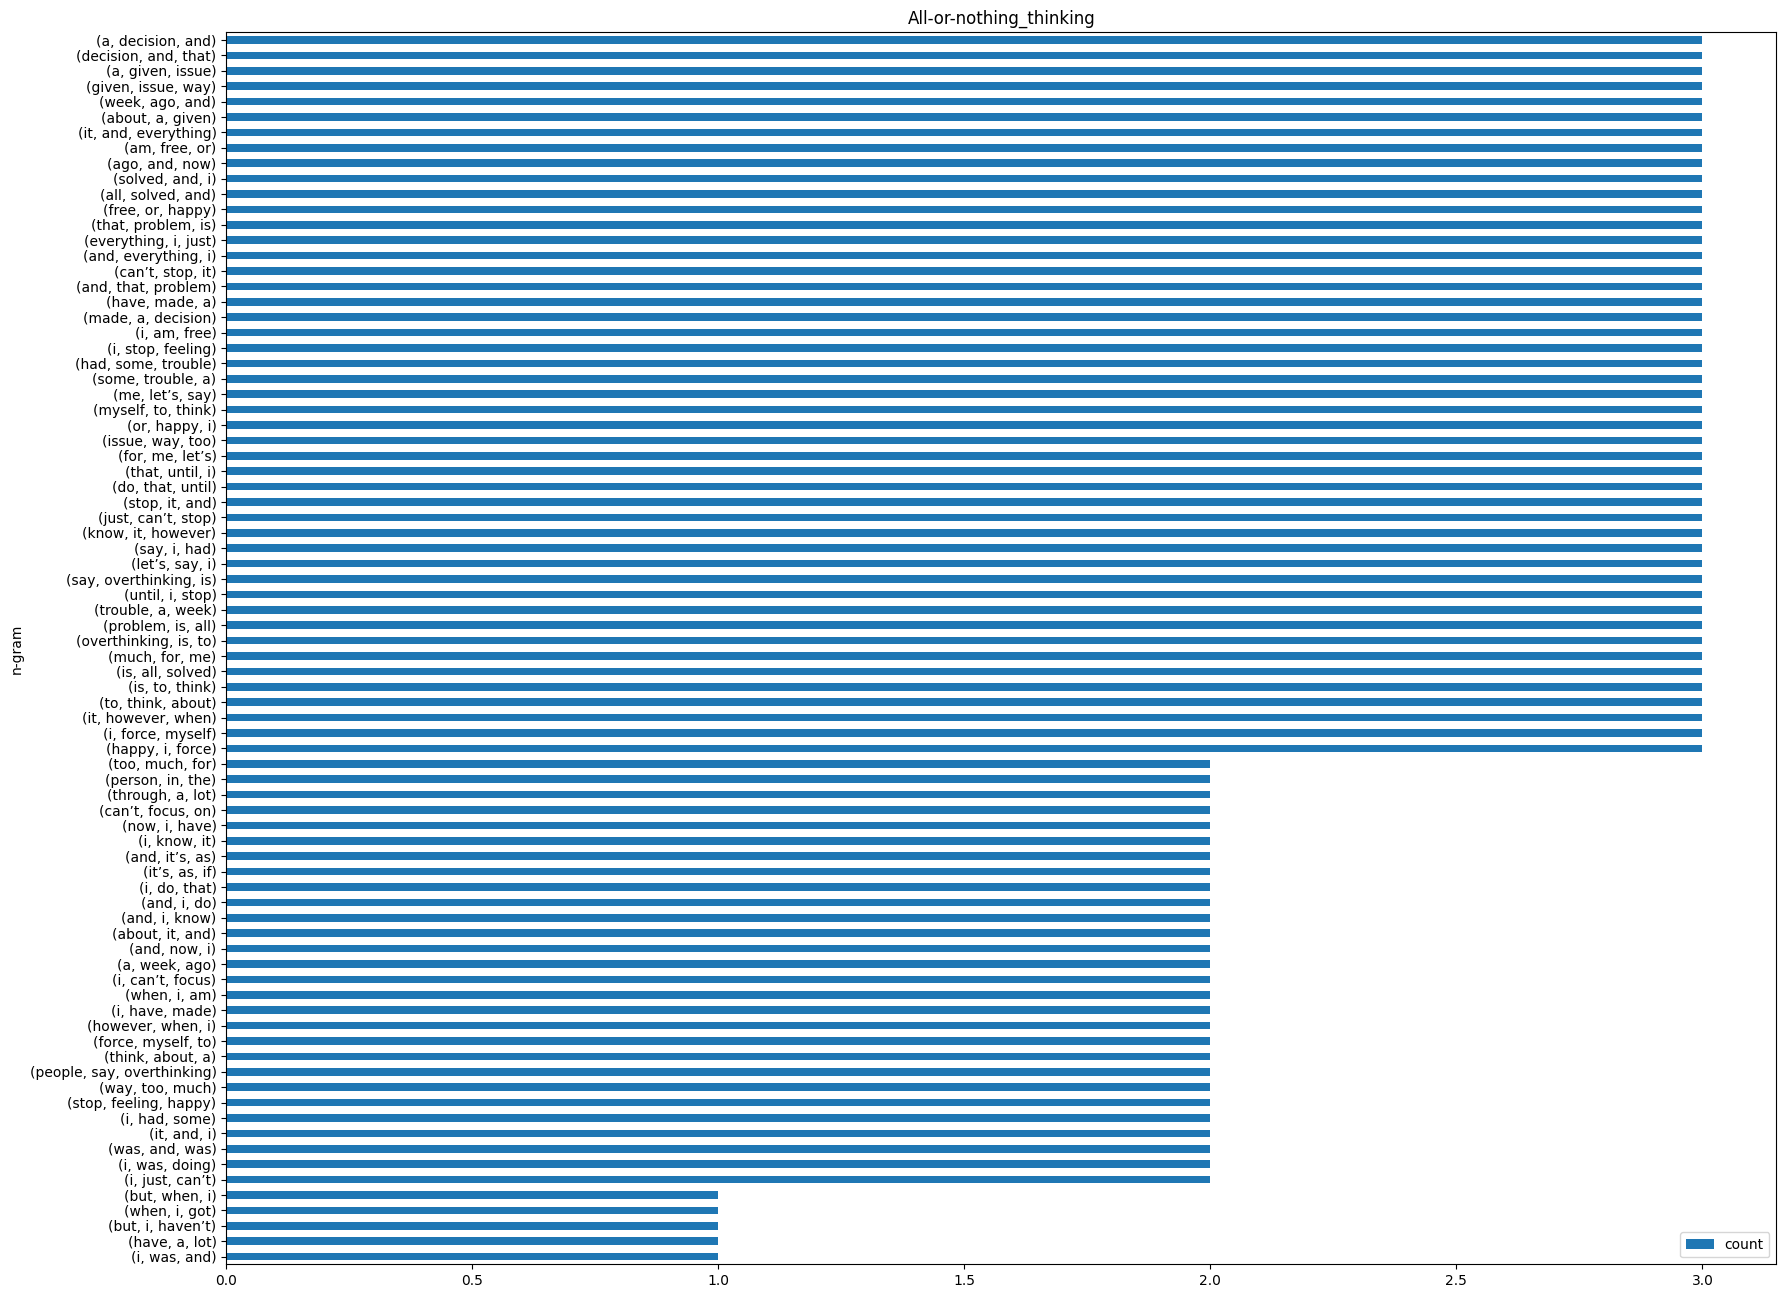

In [61]:
ng_cnt = {}
for g in l:
    ngs = build_ngrams(g,N_max)
    for ng in ngs:
        dictcount(ng_cnt,ng)
plot_dict(
    ng_cnt,
    labels="n-gram",
    values="count",
    title=category,
    head=80                # Top 20 words
)

In [59]:
#original size
size_0 = hpattern_size(l)[0]

min_cnt = 2
size_old = size_0
l_old = l
loops = 0
while (True):
    #count frequencies
    ng_cnt = {}
    for g in l_old:
        ngs = build_ngrams(g,N_max)
        for ng in ngs:
            dictcount(ng_cnt,ng)
    #found the top 
    top_cnt = 0
    top_ngs = set()
    for ng in ng_cnt:
        cnt = ng_cnt[ng]
        if cnt > top_cnt:
            top_ngs.clear()
            top_ngs.add(ng)
            top_cnt = cnt
        elif cnt == top_cnt:
            top_ngs.add(ng)
    print(top_cnt,len(top_ngs))
    if top_cnt < min_cnt:
        break
    # replace
    l_new = []
    for ng in l_old:
        new_ng = ng
        for top_ng in top_ngs:
            if len(new_ng) > len(top_ng): # if inclusion is possible
                index = tuple_find(new_ng,top_ng)
                if index >= 0:
                    new_ng = tuple_fix(new_ng,top_ng,index)
                    #print(new_ng)
        l_new.append(new_ng)
    size_new = hpattern_size(l_new)[0]
    print(size_new)
    #loops += 1
    #if loops < 20:
    if size_new < size_old:
        l_old = l_new
        size_old = size_new
    else:
        break
print(size_0,size_old) # collect the best results


3 47
965
2 10
953
1 79
1079 953


In [60]:
l_old

[('a', 'decision'),
 ('a', 'decision', 'and'),
 ('a', ('decision', 'and', 'that')),
 ('a', 'given'),
 ('a', 'given', 'issue'),
 ('a', ('given', 'issue', 'way')),
 ('a', ('week', 'ago', 'and')),
 ('about', 'a', 'given'),
 (('about', 'a', 'given'), 'issue'),
 ('about', ('it', 'and', 'everything')),
 ('ago', 'and', 'now'),
 (('ago', 'and', 'now'), 'i'),
 ('all', 'solved'),
 ('all', 'solved', 'and'),
 ('all', ('solved', 'and', 'i')),
 ('am', 'free'),
 ('am', 'free', 'or'),
 ('am', ('free', 'or', 'happy')),
 ('and', 'everything', 'i'),
 (('and', 'everything', 'i'), 'just'),
 (('and', 'i', 'do'), 'that'),
 ('and', 'i', 'know', 'it'),
 ('and', 'it’s', 'as'),
 (('and', 'it’s', 'as'), 'if'),
 ('and', ('now', 'i', 'have')),
 ('and', 'that', 'problem'),
 ('and', ('that', 'problem', 'is')),
 ('because', 'im'),
 ('but', 'i', 'haven’t'),
 ('but', 'when', 'i', 'got'),
 ('can’t', 'focus'),
 ('can’t', 'focus', 'on'),
 ('can’t', 'stop', 'it'),
 ('can’t', ('stop', 'it', 'and')),
 ('day', 'is'),
 ('decisi

In [62]:
# try pattern-mining corpus-wise and apply to n-grams only after than next!!!???

In [ ]:
# todo replace self-replacements

In [13]:
# Compute the size of model
# Compute all frequences
# Replace most frequent item everywhere
# Compute the size of model agin, if it is not decresed - stop, if it is decreased go to the beginning and repeat

# Model - compressed data
# Intepretable model - compressed model